<a href="https://colab.research.google.com/github/avigithubb/Police_Shooting_Analysis/blob/main/Death_by_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter


M_HH_income_df = pd.read_csv("Median_Household_Income_2015.csv", encoding="windows-1252")
race_df = pd.read_csv("Share_of_Race_By_City.csv", encoding="windows-1252")
below_poverty_df = pd.read_csv("Pct_People_Below_Poverty_Level.csv", encoding="windows-1252")
over_25_df = pd.read_csv("Pct_Over_25_Completed_High_School.csv", encoding="windows-1252")
deaths_df = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [2]:
M_HH_income_df.loc[M_HH_income_df["City"] == 'Homestead Base CDP']

,Geographic Area,City,Median Income
4471,FL,Homestead Base CDP,11533


In [3]:
race_df.loc[race_df["City"] == 'Homestead Base CDP']

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
4465,FL,Homestead Base CDP,40.6,55.4,0.3,0.2,33.7


In [4]:
below_poverty_df["City"].loc[below_poverty_df["poverty_rate"] == '98.6']

,City
4472,Homestead Base CDP


In [5]:
over_25_df.loc[over_25_df["City"] == 'Homestead Base CDP']

,Geographic Area,City,percent_completed_hs
4472,FL,Homestead Base CDP,70.9


In [6]:
deaths_df.groupby(["race"]).size()

,0
race,
A,39
B,618
H,423
N,31
O,28
W,1201


In [7]:
# Asian
# Black
# Hispanic
# Native Hawaiian
# Other Pacific Islander: Declines to indicate a race code
# White

In [8]:
M_HH_income_df

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [9]:
race_df

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [10]:
below_poverty_df

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [11]:
over_25_df

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [12]:
deaths_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [13]:
M_HH_income_df.shape

(29322, 3)

In [14]:
race_df.shape

(29268, 7)

In [15]:
below_poverty_df.shape

(29329, 3)

In [16]:
over_25_df.shape

(29329, 3)

In [17]:
deaths_df.shape

(2535, 14)

In [18]:
# reshaped_df = M_HH_income_df.loc[M_HH_income_df["Median Income"].isna() == True]
M_HH_income_df["Median Income"].fillna(0, inplace=True)




    # if data == True:
    #   print(M_HH_income_df.loc[M_HH_income_df["Median Income"] == data])

In [19]:
M_HH_income_df

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,0
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [20]:
deaths_df["flee"].fillna('Unknown', inplace=True)

In [21]:
deaths_df["flee"].loc[deaths_df["flee"].isna() == True]

,flee


In [169]:
below_poverty_df["poverty_rate"] = pd.to_numeric(below_poverty_df["poverty_rate"], errors="coerce")
grouped_poverty = below_poverty_df.groupby("Geographic Area").agg({"poverty_rate": pd.Series.sum})
grouped_poverty = grouped_poverty.reset_index().sort_values(by="poverty_rate", ascending=False)
grouped_poverty


,Geographic Area,poverty_rate
43,TX,34059.9
4,CA,25704.1
38,PA,22002.4
24,MO,20588.4
14,IL,18945.9
35,OH,18014.4
9,FL,16072.9
36,OK,15265.6
10,GA,14837.1
27,NC,14573.5


In [176]:
# plt.figure(figsize=(20, 20))
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel("States of US", fontsize=14)
# plt.ylabel("poverty Rate", fontsize=14)
h_bar = px.bar(y = grouped_poverty["poverty_rate"], x=grouped_poverty["Geographic Area"])

h_bar.update_layout(xaxis_title='States of US', yaxis_title='poverty Rate', width=1500, height=800)
h_bar.show()

In [171]:
over_25_df["percent_completed_hs"] = pd.to_numeric(over_25_df["percent_completed_hs"], errors="coerce")
grouped_literacy = over_25_df.groupby("Geographic Area").agg({"percent_completed_hs": pd.Series.sum})
grouped_literacy = grouped_literacy.reset_index().sort_values(by="percent_completed_hs", ascending=False)
grouped_literacy

,Geographic Area,percent_completed_hs
38,PA,156770.2
43,TX,129429.9
4,CA,123015.1
14,IL,120779.9
34,NY,108283.4
35,OH,107162.0
12,IA,90382.6
24,MO,85526.8
23,MN,80787.4
9,FL,78450.1


In [180]:
h_bar_literacy = px.bar(y = grouped_literacy["percent_completed_hs"], x=grouped_literacy["Geographic Area"])

h_bar_literacy.update_layout(xaxis_title='States of US', yaxis_title='Literacy Rate', width=1500, height=800)
h_bar_literacy.show()

Text(0, 0.5, 'Literacy Rate')

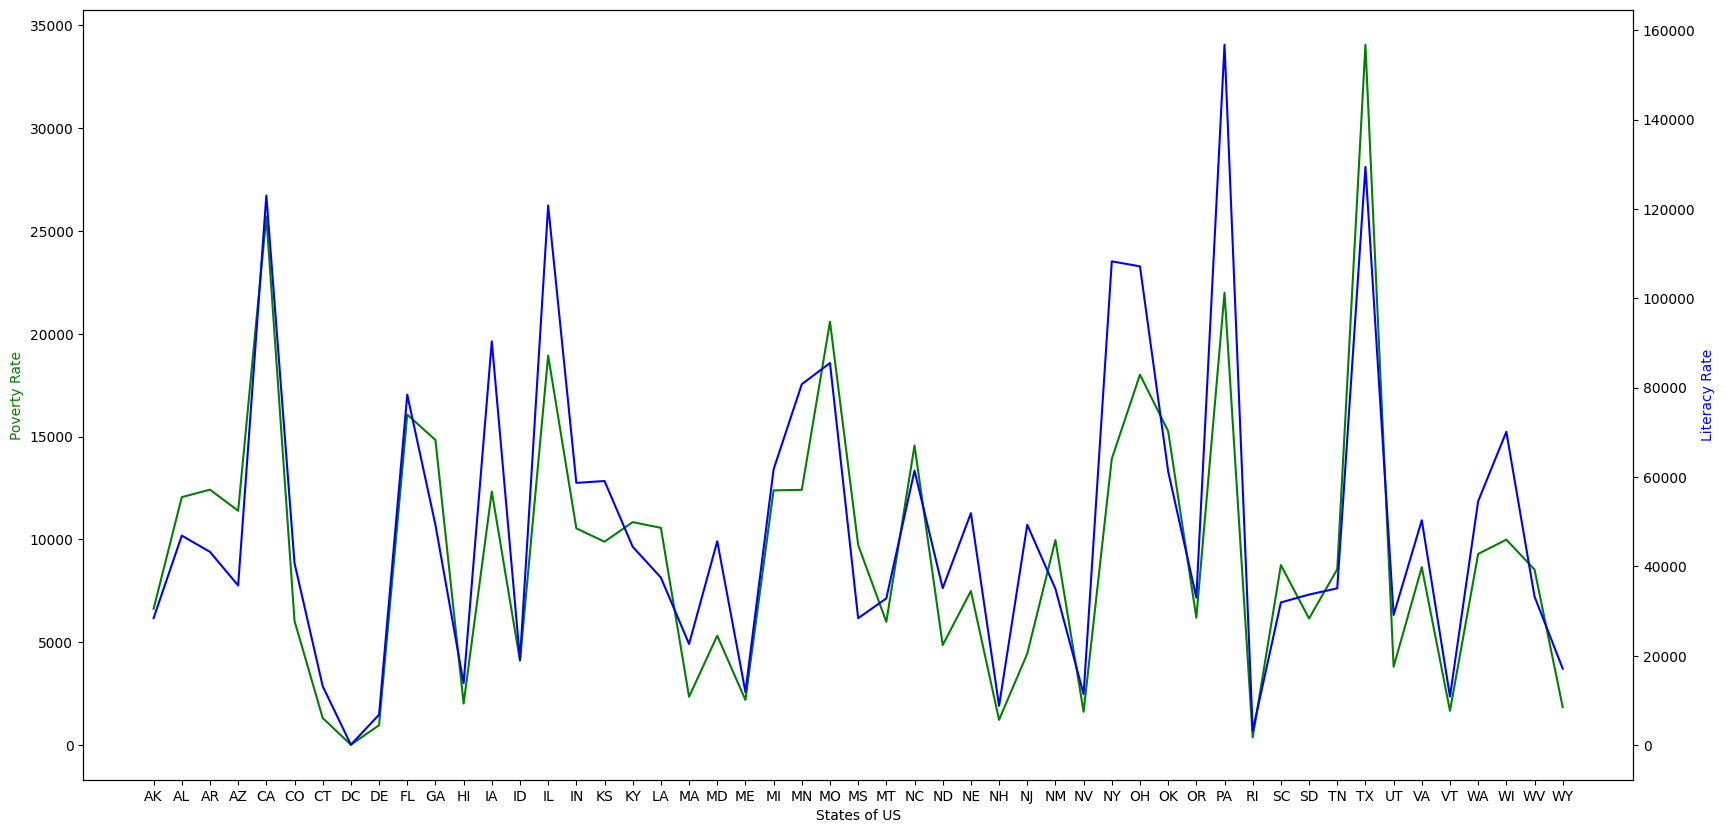

In [26]:
plt.figure(figsize=(20, 10))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(grouped_poverty["Geographic Area"], grouped_poverty["poverty_rate"], color="g")
ax2.plot(grouped_literacy["Geographic Area"], grouped_literacy["percent_completed_hs"], "b")

ax1.set_xlabel("States of US")
ax1.set_ylabel("Poverty Rate", color="green")
ax2.set_ylabel("Literacy Rate", color="blue")

In [27]:
# Now according to this two y-axis line chart we can conclude that as more the literacy in an state as more the poverty. I kinda feel sorry for Texes, despite being the second most literacy rate
# of over 120k 😲 peoples its poverty rate is quite high if not the heighest😟. But it still is not giving us a neat idea of the situation hence we can try to plot a scattered plot from seaborn.

In [28]:
import seaborn as sns

In [29]:
merged_df = grouped_poverty.merge(grouped_literacy, on="Geographic Area")

In [30]:
merged_df

,Geographic Area,poverty_rate,percent_completed_hs
0,AK,6630.9,28434.8
1,AL,12057.9,46895.6
2,AR,12423.1,43252.7
3,AZ,11395.9,35727.4
4,CA,25704.1,123015.1
5,CO,6040.0,40728.2
6,CT,1315.8,13189.2
7,DC,18.0,89.3
8,DE,966.8,6816.0
9,FL,16072.9,78450.1


<Figure size 2000x1000 with 0 Axes>

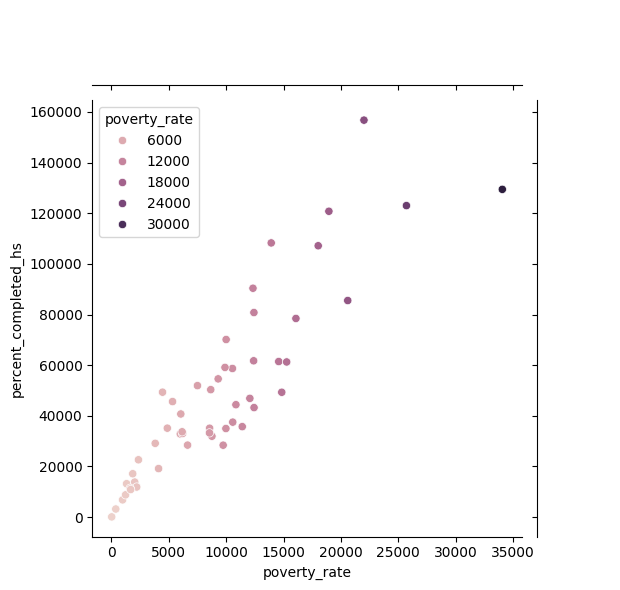

In [31]:
plt.figure(figsize=(20, 10))
sns.jointplot(data=merged_df,
         x = "poverty_rate",
         y = "percent_completed_hs",
         kind="scatter",
         hue="poverty_rate")

plt.show()

In [32]:
# According to this scattered jointplot we can finally say that poverty_rate is most for the states having high literacy_rate or for those states where peoples have completed their highschool
# the most. We can see that for a state with about 120k+ literate people having very high literacy rate has the most poverty_rate which is about 97% peoples unemployed.

In [33]:
# Now to see it more clearly we can make a regression line for it to analyse thoghroly.

<Figure size 2000x1000 with 0 Axes>

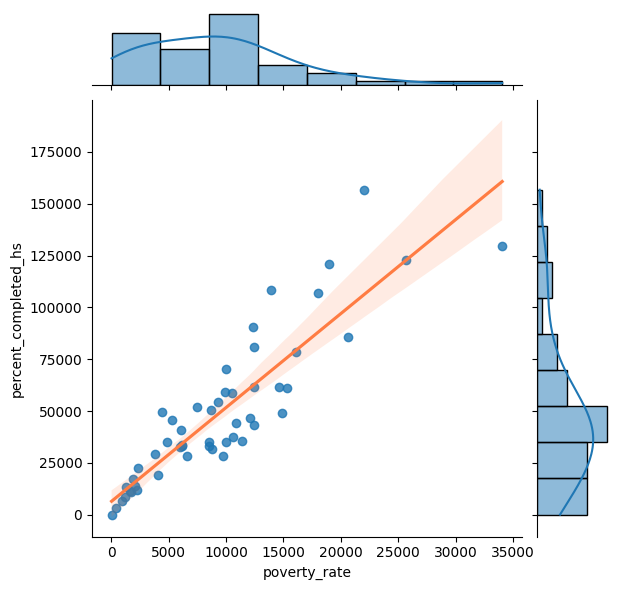

In [34]:
plt.figure(figsize=(20, 10))
sns.jointplot(data=merged_df,
              x="poverty_rate",
              y="percent_completed_hs",
              kind="reg",
              line_kws = {'color': '#ff7c43'})

plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression()

In [37]:
X = pd.DataFrame(merged_df, columns=["poverty_rate"])
y = pd.DataFrame(merged_df, columns=["percent_completed_hs"])

In [38]:
regression.fit(X, y)

LinearRegression()

In [39]:
regression.intercept_

array([6426.02133304])

In [40]:
regression.coef_

array([[4.53019411]])

In [41]:
# Now what does that data represents. Well its basically means that for a 0% of poverty there is almost 6.42% literate people in a given state and that literacy increases at the rate of
# 4.53% for each increasing poverty rate. I don't know why this data giving us that kind of information where we can simply tell that as more the povety is grouwing as more the literacy of
# that state.

In [42]:
race_df["share_white"] = pd.to_numeric(race_df["share_white"], errors="coerce")
race_df["share_black"] = pd.to_numeric(race_df["share_black"], errors="coerce")
race_df["share_native_american"] = pd.to_numeric(race_df["share_native_american"], errors="coerce")
race_df["share_asian"] = pd.to_numeric(race_df["share_asian"], errors="coerce")
race_df["share_hispanic"] = pd.to_numeric(race_df["share_hispanic"], errors="coerce")

category_df = race_df.groupby("Geographic area").agg({"share_white": pd.Series.sum,
                                                      "share_black": pd.Series.sum,
                                                      "share_native_american": pd.Series.sum,
                                                      "share_asian": pd.Series.sum,
                                                      "share_hispanic": pd.Series.sum})
category_df = category_df.reset_index()
category_df

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,16068.8,199.7,16144.4,488.7,756.5
1,AL,41909.2,13480.3,381.1,277.3,1722.5
2,AR,42441.2,8816.6,411.1,258.1,2311.7
3,AZ,27028.0,430.5,12894.0,327.7,9085.2
4,CA,108949.3,4081.1,2612.2,8441.4,44949.2
5,CO,40197.9,420.3,744.2,528.9,8197.6
6,CT,12313.1,713.9,93.9,427.5,1140.5
7,DC,38.5,50.7,0.3,3.5,9.1
8,DE,5794.7,1169.9,39.8,152.0,563.7
9,FL,72378.7,12301.2,419.0,1487.4,15206.8


In [43]:
category_df.describe()

,share_white,share_black,share_native_american,share_asian,share_hispanic
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,47721.745098,3919.580392,1648.919608,885.421569,5350.350980
std,37327.915089,5215.753688,3253.154610,1392.742367,11397.629052
min,38.500000,50.700000,0.300000,3.500000,9.100000
25%,20975.950000,199.400000,158.350000,183.500000,1154.450000
50%,38158.300000,906.700000,429.600000,373.300000,2427.800000
75%,62561.300000,5909.300000,1259.300000,917.050000,4095.700000
max,164498.700000,19176.600000,16144.400000,8441.400000,68809.800000


In [44]:
# Now we know the maximum count each category wise which will help us in ploting a bar chart with subcategories

In [45]:
column_names = category_df.columns[1:]
category_long_df = category_df.melt(id_vars=["Geographic area"],
                                    value_vars=column_names,
                                    var_name="Race",
                                    value_name="Share")
category_long_df


,Geographic area,Race,Share
0,AK,share_white,16068.8
1,AL,share_white,41909.2
2,AR,share_white,42441.2
3,AZ,share_white,27028.0
4,CA,share_white,108949.3
...,...,...,...
250,VT,share_hispanic,164.2
251,WA,share_hispanic,6662.1
252,WI,share_hispanic,2568.9
253,WV,share_hispanic,362.6


In [46]:

category_bar = px.bar(category_long_df,
                      x="Share",
                      y="Geographic area",
                      title="share_by_race_in_each_state",
                      color="Race",
                      barmode="group")

category_bar.update_layout(xaxis_title="count by race",
                           yaxis_title="States",
                           width=1500,
                           height=1500)

category_bar.show()

In [47]:
# As we can see that almost in every state the share of white people is far more than ant other race except for Alaska where the share of white peoples are simmilar or maybe less than the
# native american race. Also Texes where the poverty rate is highest and literacy rate is 2nd highest the share of white people is 2nd highest in overall shares of races in each states.

In [48]:
Killed_by_race_df = deaths_df["race"].value_counts().reset_index(name="race_count")

In [49]:
Killed_by_race_df

,race,race_count
0,W,1201
1,B,618
2,H,423
3,A,39
4,N,31
5,O,28


In [50]:
fig = px.pie(labels=Killed_by_race_df.race,
             values=Killed_by_race_df.race_count,
             title="People killed by race in US",
             names=Killed_by_race_df.race,
             hole=0.6)

fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")
fig.show()

In [51]:
# When analyzing the racial distribution of people killed across various states, it’s essential to consider the population size of each race. Naturally,
# the number of deaths among white people is higher simply because they constitute a larger portion of the population. However, a closer look at the data for Black and Hispanic communities
# reveals concerning patterns.

In [52]:
gender_based_df = deaths_df["gender"].value_counts().reset_index(name="death_count")
gender_based_df

,gender,death_count
0,M,2428
1,F,107


In [53]:
gender_based_fatalities = px.bar(gender_based_df,
                      x="gender",
                      y="death_count",
                      title="Gender based Fatalities",
                      color="gender")

gender_based_fatalities.update_layout(xaxis_title="Gender",
                           yaxis_title="Death count",
                           width=500,
                           height=800)

gender_based_fatalities.show()

In [54]:
# About 2321 more men were killed compared to that of women. The ratio is far distinct 😶.

In [55]:
deaths_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [56]:
grouped_manner_of_death = deaths_df.groupby(["gender", "manner_of_death"]).count().reset_index()
final_manner_df = grouped_manner_of_death[["gender", "manner_of_death", "name"]]
final_manner_df

,gender,manner_of_death,name
0,F,shot,102
1,F,shot and Tasered,5
2,M,shot,2261
3,M,shot and Tasered,167


In [57]:
# manner_of_death_plot = px.box(grouped_manner_of_death,
#                               y="")

In [62]:
fig = px.box(deaths_df,
             x="manner_of_death",
             y="age",
             color="gender",
             points="all",  # Optional: shows all points on top of the box plot
             title="Box Plot of Death Counts by Gender and Manner of Death")

# Show the plot
fig.show()

In [63]:
# Male Age Distribution:

# The upper fence for males who were shot is approximately 73 years, while the lower fence is around 6 years. This suggests that men across a wide age range, from young children to older adults, were involved in these incidents.
# The most common age range for men who were shot is between 26 and 45 years. This is evident from the dense cluster of data points in this age range, indicating that younger adults are more frequently involved in such incidents.
# The median age for men who were shot and tasered is 35 years, making it the most likely age for males to experience both actions.

# Female Age Distribution:

# For women, the upper fence is slightly lower at 71 years, and the lower fence is at 12 years, indicating a somewhat narrower age range compared to men.
# Similar to men, the most common age range for women who were shot is between 26 and 46 years. This range encompasses the ages where women are most frequently shot.
# The median age for women who were shot and tasered is 37 years, suggesting that this age group is particularly vulnerable to such incidents.

# Key Observations:

# Both genders show a concentration of incidents in the 26-46 age range, highlighting this as the most at-risk group for being shot or tasered.
# While the median age for men who were shot is slightly younger than for women, the overall patterns are similar, with a slight difference in the extremes of the age ranges.

In [74]:
is_armed_df = deaths_df["armed"].value_counts()
is_armed_df = is_armed_df.reset_index(name="armed_count")
is_armed_df

,armed,armed_count
0,gun,1398
1,knife,373
2,vehicle,177
3,unarmed,171
4,undetermined,117
...,...,...
63,hand torch,1
64,garden tool,1
65,pole,1
66,pick-axe,1


In [75]:
fig = px.pie(labels=is_armed_df.armed,
              values=is_armed_df.armed_count,
              title="Armed or Unarmed",
              names=is_armed_df.armed,
              hole=0.6)

fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")
fig.show()

In [76]:
# Hence by analysing the chart we can see that peoples who were shot by police were armed with some weapons in most of the cases.
# About 55.3% peoples were carying a gun.
# About 14% carying out a knife.
# And about 7% having a vehicle using as a weapon.
# And about in 7% of the cases the peoples were unarmed.

# There is a huge difference in peoples that was armed and the peoples who were unarmed making it very difficult to catch them. Usually peoples like this always caries such weapons obviously
# to protect themselves and out of fear to get caught by police too, Therefor making the cause of the difference.

In [92]:
age_df = deaths_df.groupby([deaths_df["age"] <= 25]).size()
age_df

,0
age,
False,1982
True,553


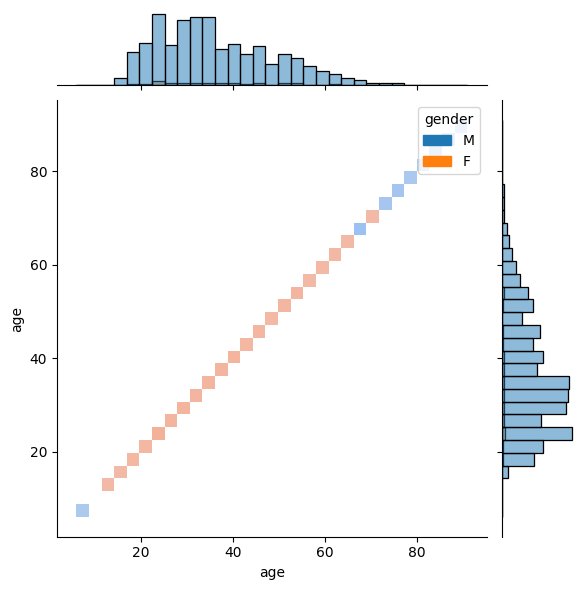

In [99]:
# fig = px.histogram(deaths_df,
#                    x = "age",
#                    color="gender",
#                    nbins = 20,
#                    title = "Histogram of age distribution by age")

# fig.show()
ano_age_df = deaths_df["gender", "age"]
sns.jointplot(data=deaths_df, x="age", y="age", hue="gender", kind="hist")

In [95]:
# About 385 peoples are between age group of 25-29. As for Females the number is 18 which is a descent number considering their strength and also 18 is the highest in all age groups.

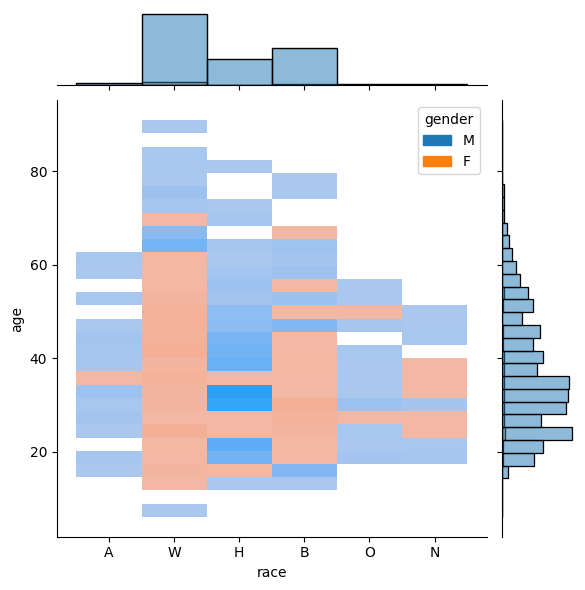

In [102]:
# Create a seperate KDE plot for each race. Is there a difference between the distributions?
my_race_df = deaths_df[["gender", "race", "age"]]
sns.jointplot(data=my_race_df, x="race", y="age", hue="gender", kind="hist")

In [103]:
# Although the chart don't seem very definitive but we can see that the highest age group which got killed is white peoples all along, among most of them were male and white females too.

In [110]:
grouped_race = deaths_df.groupby("race").size().reset_index(name="death_race")
grouped_race

,race,death_race
0,A,39
1,B,618
2,H,423
3,N,31
4,O,28
5,W,1201


In [114]:
fig = px.bar(grouped_race,
             x="race",
             y="death_race",
             title="Death by Race",
             color="race")


fig.show()

In [115]:
deaths_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [119]:
mental_df = deaths_df.groupby("signs_of_mental_illness").size().reset_index(name="mentally_ill")
mental_df

,signs_of_mental_illness,mentally_ill
0,False,1902
1,True,633


In [120]:
fig = px.pie(labels=mental_df.signs_of_mental_illness,
              values=mental_df.mentally_ill,
              title="Armed or Unarmed",
              names=mental_df.signs_of_mental_illness,
              hole=0.6)

fig.update_traces(textposition="inside", textfont_size=15, textinfo="percent")
fig.show()

In [121]:
# 25% of the people that were killed found to be mentally ill. That is a huge number by the way 🙄. You can't punish a person with somekind of illness but what can be done.

In [136]:
dangerous_city_df = deaths_df.groupby("city").size().reset_index(name="city_count").sort_values(by="city_count", ascending=False)[: 10]
dangerous_city_df

,city,city_count
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
1118,San Antonio,20
284,Columbus,19
808,Miami,18
60,Austin,18
1217,St. Louis,15


In [137]:
fig = px.bar(dangerous_city_df,
             x="city",
             y="city_count",
             color="city",
             title="Top 10 dengerous Cities")
fig.update_layout(xaxis_title="Cities",
                  yaxis_title="Shootout Count")

fig.show()

In [139]:
# These are the cities with most of the shootouts happened hence making them very dangerous places. Normally these places are tourists main attraction and thus fully crowded
# A crowd makes easy crimes happen also it shelters most of the criminals. Hence this result.

In [154]:
dangerous_city_race_df = deaths_df.groupby(["city", "race"]).size().reset_index(name="city_count").sort_values(by="city_count", ascending=False)
filtered_df = dangerous_city_race_df[dangerous_city_race_df["city"].isin(dangerous_city_df["city"])]
filtered_df

,city,race,city_count
263,Chicago,B,21
828,Los Angeles,H,19
645,Houston,B,15
75,Austin,W,13
1257,San Antonio,H,12
1126,Phoenix,W,12
319,Columbus,B,11
1124,Phoenix,H,11
1368,St. Louis,B,11
827,Los Angeles,B,10


In [155]:

category_bar = px.bar(filtered_df,
                      x="city_count",
                      y="city",
                      title="Top 10 Dangerous cities with races",
                      color="race",
                      barmode="group")

category_bar.update_layout(xaxis_title="count by race",
                           yaxis_title="States",
                           width=1500,
                           height=1500)

category_bar.show()

In [162]:
# Now in phonix, Austin and las Vagas most of the criminals shot were white people with an average of 10 white peoples.
# However chicago, Houston, Columnbus and St. Louis has the maximum criminals that were Black.
# In Los Angeles, San Antonio and Phoenix Hispanics make a big fuss.

# In most of the cities there seems to be a majority of black people somehow and that these are some famous cities so it doesn't matters if the other races were infact indulged in malpractices
# in other cities because the image that were build in famous cities make out an expression of somekind for a particular thing. Even if the blacks are not so bad in other states it won't work
# for them.

In [159]:
fatalities_state_df = deaths_df.groupby("state").size().reset_index(name="death_count").sort_values(by="death_count", ascending=False)[: 10]
fatalities_state_df

,state,death_count
4,CA,424
43,TX,225
9,FL,154
3,AZ,118
35,OH,79
36,OK,78
5,CO,74
10,GA,70
27,NC,69
24,MO,64


In [161]:
fig = px.bar(fatalities_state_df,
             x="state",
             y="death_count",
             title="Statewise shootouts",
             color="state")

fig.update_layout(xaxis_title="States",
                  yaxis_title="Death Count")

fig.show()

In [177]:
h_bar.show()

In [181]:
h_bar_literacy

In [182]:
# By analysing these last three charts we can see that the crime rates are higher where the literacy_rate is lower that directly ralated to the poverty_rate of the state.

In [184]:
deaths_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [187]:
deaths_df.date = pd.to_datetime(deaths_df.date)

<ipython-input-187-bacf3677ea8c>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [188]:
deaths_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [190]:
year = deaths_df.date.dt.year

In [191]:
deaths_df.insert(2, 'year', year)

In [192]:
deaths_df

,id,name,year,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017,2017-07-28,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017,2017-07-28,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017,2017-07-29,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017,2017-07-31,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [195]:
shootout_trend_by_year = deaths_df.groupby("year").size().reset_index(name="shoot count")
shootout_trend_by_year

,year,shoot count
0,2015,991
1,2016,963
2,2017,581


In [196]:
fig_shoot_trend = px.bar(shootout_trend_by_year,
                         x="year",
                         y="shoot count",
                         color="year",
                         title="Shooting Trend")

fig_shoot_trend.update_layout(xaxis_title="Years",
                              yaxis_title="Deaths Per Year")

fig_shoot_trend.show()

In [198]:
# According to this graph the death rate for countries is lesser down a lot in just few years.